In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Image
from scipy.misc import imread, imresize,imshow

# Make sure that caffe is on the python path:
caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Load the net, list its data and params, and filter an example image.
caffe.set_mode_gpu()
net = caffe.Net('/media/lqyu/Data/ISBI2016_Skin_Lession/part1/deep-residual-network-train/ResNet-50-skin-deploy.prototxt',
                '/media/lqyu/Data/ISBI2016_Skin_Lession/part1/deep-residual-network-train/snapshot/ResNet_iter_2619.caffemodel',
                caffe.TEST)
#print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))


(1095, 974, 3)
(1, 3, 600, 600)


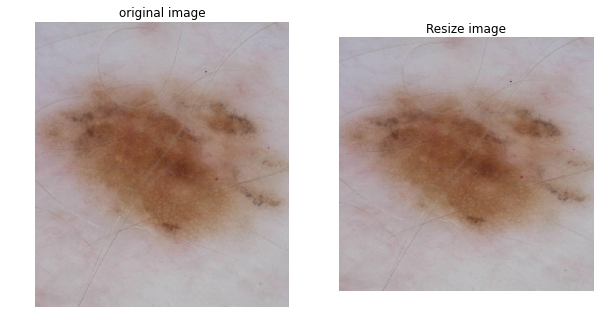

In [11]:
# load image and prepare as a single input batch for Caffe
img_id = 'ISIC_0000018'
img_path = '/media/lqyu/Data/ISBI2016_Skin_Lession/part1/cropped_data/cropped_image/'+img_id+'.jpg';
seg_path = '/media/lqyu/Data/ISBI2016_Skin_Lession/part1/cropped_data/cropped_seg/'+img_id+'.png';
im = np.array(imread(img_path))

plt.figure()
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(im)
plt.axis('off')
print im.shape
im_resize = imresize(im,[600,600])
plt.subplot(1,2,2)
plt.title("Resize image")
plt.imshow(im_resize)
plt.axis('off')

im_input = im_resize.transpose((2,0,1))[np.newaxis,:,:,:]
print im_input.shape

net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

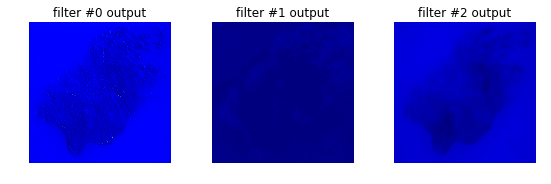

In [4]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv1'].data.min(), net.blobs['conv1'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv1'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

(-0.5, 607.5, 607.5, -0.5)

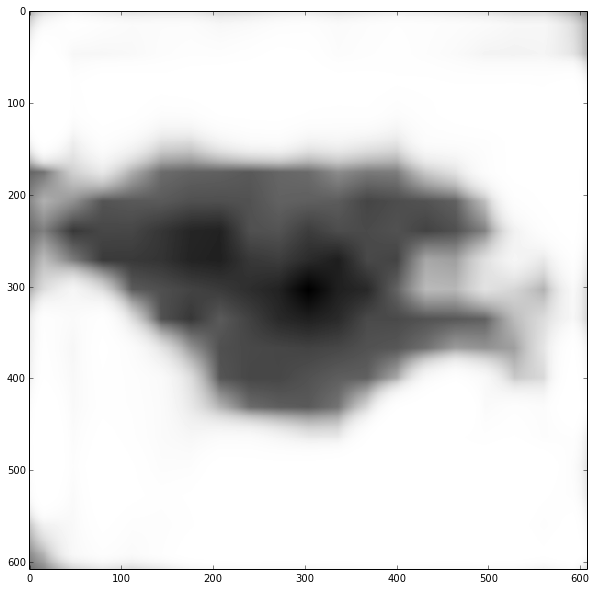

In [33]:
net.forward()
prob = net.blobs['prob'].data
#prob = net.blobs['score-pool5'].data

result = np.argmax(prob,axis=1)
result = result[0,:,:];
prob_map = prob[0,1,:,:]
#prob = prob.sum(axis=1)
#print prob.shape
#prob_map = prob[0,:,:];
#print prob_map
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(prob_map)
plt.axis('on')


In [40]:
# pick first filter output
conv0 = net.blobs['conv1'].data[0, 0]
print("pre-surgery output mean {:.2f}".format(conv0.mean()))
# set first filter bias to 10
net.params['conv1'][1].data[0] = 1.
net.forward()
print("post-surgery output mean {:.2f}".format(conv0.mean()))

pre-surgery output mean 3.95
post-surgery output mean 3.95


In [24]:
img_id = 'ISIC_0000018'
img_path = '/media/lqyu/Data/ISBI2016_Skin_Lession/part1/cropped_data/cropped_image/'+img_id+'.jpg';
seg_path = '/media/lqyu/Data/ISBI2016_Skin_Lession/part1/cropped_data/cropped_seg/'  +img_id+'.png';
im = np.array(imread(img_path))
print im.max()
print im.min()

255
0
